# Load and Clean Data

The dataset in this initial analysis is San Francisco Crime data from 2003-May 2018. I downloaded this particular dataset from the San Francisco Open Data website, but in the future, I will download the dataset via SODA API.

In [49]:
import pandas as pd
from sklearn.impute import SimpleImputer
import datetime
import matplotlib.pyplot as plt

In [50]:
train = pd.read_csv('train.csv', parse_dates=['Dates'])

# First plot: Do we have enough detailed data to work with?

If we don't have enough data, then we can't really make accurate predictions. So, to that point, I will now see if we have enough location, time, and crime description data.

In [51]:
train[['X', 'Y']].isna().sum()

X    0
Y    0
dtype: int64

Location data is all there, but there are some records with a location not in San Francisco--I will replace the record locations with a district average.

In [27]:
# clean data--there are some locations that are outside of San Francisco

train.drop_duplicates(inplace=True) # remove duplicates
train.replace({'X': -120.5, 'Y': 90.0}, np.NaN, inplace=True) # replace erroneous coordinates with NaN

imp = SimpleImputer(strategy='mean') # impute District average to these values

for district in train['PdDistrict'].unique():
    train.loc[train['PdDistrict'] == district, ['X', 'Y']] = imp.fit_transform(
        train.loc[train['PdDistrict'] == district, ['X', 'Y']])

In [52]:
train['Dates'].isna().sum()

0

Time data is all there as well. I will update the format to DateTime so that it is easier to work with.

In [54]:
# change data formats to date and add month, year, hour columns

def feature_engineering(data):
    data['Date'] = pd.to_datetime(data['Dates'].dt.date)
    data['DayOfWeek'] = data['Dates'].dt.weekday
    data['Day'] = data['Dates'].dt.day
    data['Month'] = data['Dates'].dt.month
    data['Year'] = data['Dates'].dt.year
    data['Hour'] = data['Dates'].dt.hour
    data['Minute'] = data['Dates'].dt.minute
    data['Block'] = data['Address'].str.contains('block', case=False)
    
    data.drop(columns=['Dates','Date','Address'], inplace=True)
        
    return data

train = feature_engineering(train)

The last piece of data we need to check is Crime Description data. If we don't have enough or accurate description data, then it will be hard for us to perform our analyses. 

In [57]:
train['Category'].isna().sum()

0

The Crime Description data is all there. Let's take a closer look.

In [59]:
len(train['Category'].unique())

39

There are 39 different categories of crime in this dataset. That is a lot, but it's great that we have this level of detail, because we may be able to tease out patterns based on the crime category.

In [61]:
train.groupby(['Category']).size().sort_values(ascending=False)

Category
LARCENY/THEFT                  174900
OTHER OFFENSES                 126182
NON-CRIMINAL                    92304
ASSAULT                         76876
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53781
VANDALISM                       44725
WARRANTS                        42214
BURGLARY                        36755
SUSPICIOUS OCC                  31414
MISSING PERSON                  25989
ROBBERY                         23000
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7326
STOLEN PROPERTY                  4540
SEX OFFENSES FORCIBLE            4388
DISORDERLY CONDUCT               4320
DRUNKENNESS                      4280
RECOVERED VEHICLE                3138
KIDNAPPING                       2341
DRIVING UNDER THE INFLUENCE      2268
RUNAWAY                          1946
LIQ

In [ ]:
(174320 + 125960 + 91915 + 76815 + 53919 + 53706 + 44581 + 42145 + 36600 +31394 ) / 875726 # >80% of crimes fall into 9 categories.

Larceny/Theft tops the crime frequency list. It's interesting to note that over 80% of the crimes in this dataset fall into 9 categories. I would focus on these 9 categories in my analysis as it is more likely that we will find a pattern in these common categories than in the less common categories.

# Second plot: Does crime correlate with foot traffic?

I plan to add foot traffic data via the ThinkNum Facebook Followers data set to my analysis. My hypothesis is that crime is correlated to foot traffic. If that is true, then we could predict crime occurrence using foot traffic data. Let's see what patten we see in just the San Francisco Crime dataset.

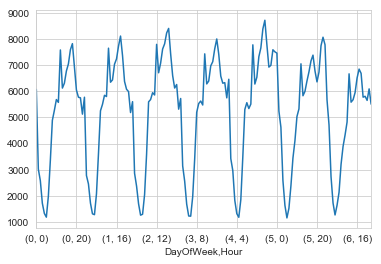

In [64]:
train.groupby(['DayOfWeek', 'Hour']).size().plot()

It appears that crime does correlate with foot traffic. As you can see, crime drops in the early morning hours when most people are asleep, and rises in the late morning, afternoon, and evening hours when people are out. A deeper analysis of this data along with detailed foot traffic data will uncover more insights about the relationship between crime and foot traffic.